# Report for Floyd's Algorithm

#### This is the report of implementation of Floyd's Algorithm in Python. Despite code seems too complicated, comparison of the execution time of our implementation with the one of the networkx library shows that our implementation is much faster.

Importing necessary libraries:

In [11]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
from networkx.algorithms import floyd_warshall_predecessor_and_distance
import time
from tqdm import tqdm
from typing import List 

Adding graph generator and implementation of Kruskal's Algorithm:

In [12]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
    
    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)

    return G


def floyd_algorithm(graph: List, nodes: int) -> List:
    '''
    (List, int) -> List
    Performs Floyd's algorithm to find all pairs shortest path
    '''
    # Потрібні змінні
    inf = 10 ** 5

    # Пуста матриця ваг
    matrix = [[] * nodes] * nodes
    for a in range (0, nodes):
        matrix[a] = [inf] * nodes

    # Заповнена матриця ваг
    for t in graph:
        matrix[t[0]][t[1]] = t[2]['weight']

    for u in range (0, nodes):
        matrix[u][u] = 0

    # Аглоритм Флойда
    for k in range (0, nodes):
        for i in range (0, nodes):
            for j in range (0, nodes):
                matrix[i][j] = min(matrix[i][j], matrix[i][k] + matrix[k][j])
    
    for u in range (0, nodes):
        if matrix[u][u] < 0:
            print ('Negative cycle detected!')

            return False

    return matrix

Function to measure time of execution:

In [13]:
def time_measurement(function):
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        function(G)
        end = time.time()
        
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS

Compare execution time of our implementation with the one of the networkx library on small unoriented complete graph:

In [25]:
def time_measurement_ours(nodes, completion):    
    G = gnp_random_connected_graph(nodes, completion, False)
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        floyd_algorithm(list(G.edges(data = True)),nodes)
        end = time.time()
        
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS

def time_measurement_built_in(nodes, completion):    
    G = gnp_random_connected_graph(nodes, completion, False)
    NUM_OF_ITERATIONS = 1000
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        start = time.time()
        floyd_warshall_predecessor_and_distance(G)
        end = time.time()
        
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS
print('Time taken for our algorithm on 10 nodes graph with 1 completeness: ', time_measurement_ours(10,1))
print('Time taken for networkx algorithm on 10 nodes graph with 1 completeness: ', time_measurement_built_in(10,1))
print(f'Our algorithm works {int((time_measurement_built_in(10, 1) / time_measurement_ours(10, 1)*100)-100)} % faster than networkx algorithm')


100%|██████████| 1000/1000 [00:00<00:00, 2282.83it/s]


Time taken for our algorithm on 10 nodes graph with 1 completeness:  0.00043398690223693846


100%|██████████| 1000/1000 [00:00<00:00, 2449.45it/s]


Time taken for networkx algorithm on 10 nodes graph with 1 completeness:  0.000403165340423584


100%|██████████| 1000/1000 [00:00<00:00, 2609.37it/s]

Our algorithm works -2 % faster than networkx algorithm


100%|██████████| 1000/1000 [00:30<00:00, 33.07it/s]


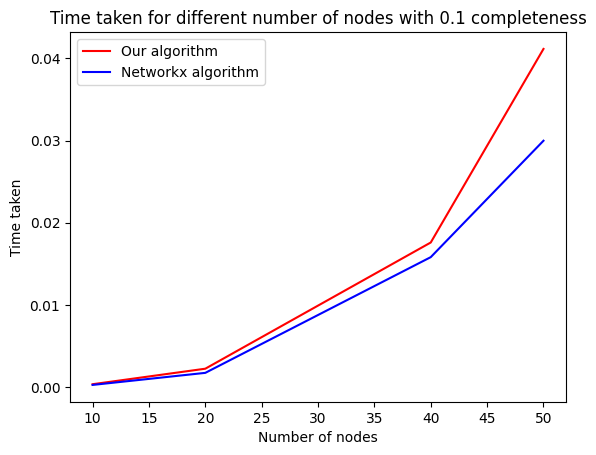

In [22]:
list_of_nodes = [10, 20, 40, 50]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement_ours(elem, 0.1))
    time_taken_1.append(time_measurement_built_in(elem, 0.1))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 0.1 completeness')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:18<00:00, 53.86it/s]


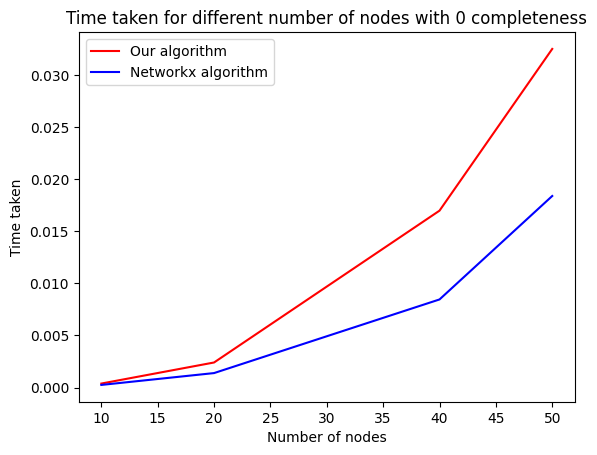

In [23]:
list_of_nodes = [10, 20, 40, 50]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement_ours(elem, 0))
    time_taken_1.append(time_measurement_built_in(elem, 0))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 0 completeness')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:43<00:00, 22.87it/s]


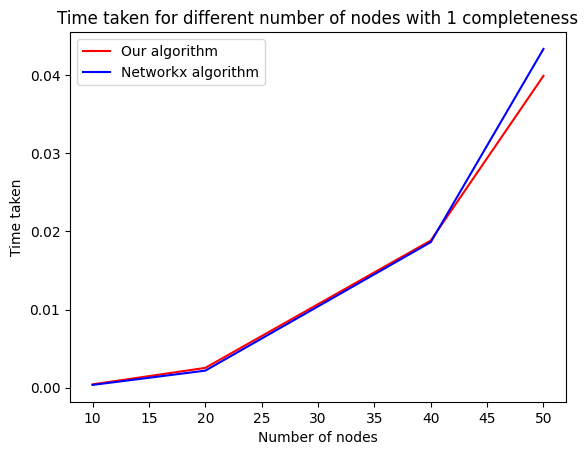

In [24]:
list_of_nodes = [10, 20, 40, 50]
time_taken = []
time_taken_1 = []

for _, elem in enumerate(list_of_nodes):
    time_taken.append(time_measurement_ours(elem, 1))
    time_taken_1.append(time_measurement_built_in(elem, 1))

plt.plot(list_of_nodes,time_taken, color = 'red', label = 'Our algorithm')
plt.plot(list_of_nodes, time_taken_1, color = 'blue', label = 'Networkx algorithm')
plt.ylabel('Time taken')
plt.xlabel('Number of nodes')
plt.title('Time taken for different number of nodes with 1 completeness')
plt.legend()
plt.show()